In [1]:
import pickle

from sklearn.model_selection import train_test_split
from wbn.classifier import WBN
from wbn.object import Document, DocumentData, Documents

In [2]:
# Load dataset
with open("../data/pr-newswire.pickle", "rb") as infile:
    raw_data = pickle.load(infile)

# De-structure 'data' and 'target'
data = raw_data.get("data")
target = raw_data.get("target")

# Construct Document's for each data/target entry
pr_newswire = Documents(
    [
        Document(DocumentData(paragraphs, keywords), target[idx])
        for idx, (paragraphs, keywords) in enumerate(data)
    ]
)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    pr_newswire.data, pr_newswire.target, test_size=0.2
)

In [3]:
# Build WBN
wbn = WBN()

# Fit WBN Model
wbn.fit(x_train, y_train)

[Classification(dag=<networkx.classes.digraph.DiGraph object at 0x104994040>, cls='stock-split', corpus=['exist', 'adjust', 'number', 'confirm', 'date', 'approv', 'convert', 'receiv', 'effect', 'stock', 'dividend', 'reclassifi', 'lieu', 'reduc', 'forward', 'post', 'transact', 'declar', 'payment', 'cash', 'term', 'complet', 'author', 'implement', 'ratio', 'offici', 'consolid', 'price', 'expect', 'fraction', 'plan', 'propos', 'revers', 'new', 'basi', 'announc', 'proport', 'payabl', 'close', 'outstand', 'busi', 'proceed', 'share', 'upward', 'trade', 'split', 'round', 'exact', 'result', 'effectu', 'pre', 'evenli', 'stockhold', 'record']),
 Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10493b520>, cls='merger-acquisition', corpus=['offer', 'pleas', 'relat', 'approv', 'sign', 'gross', 'receiv', 'estim', 'compens', 'total', 'forma', 'stock', 'proce', 'own', 'reach', 'sub', 'potenti', 'bid', 'stake', 'condit', 'go', 'major', 'preliminari', 'enterpris', 'divestitur', 'ownersh

In [4]:
# Predict
pred = wbn.predict(x_test)

# Reverse encode classes
y_pred = wbn.reverse_encode(target=pred)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)

In [6]:
c_matrix = confusion_matrix(y_test, y_pred)

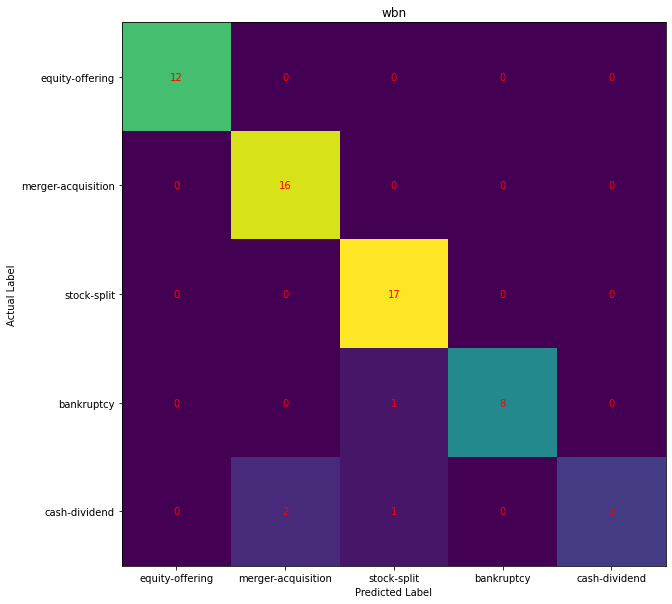

In [7]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(wbn.reverse_encode([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
plt.title("wbn")
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')
plt.savefig("wbn")

In [8]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Precision Score: 0.9405458089668616
Recall Score: 0.9333333333333333
F1 Score: 0.9264161220043572


In [9]:
# Classification Report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        bankruptcy       1.00      1.00      1.00        12
     cash-dividend       0.89      1.00      0.94        16
   equity-offering       0.89      1.00      0.94        17
merger-acquisition       1.00      0.89      0.94         9
       stock-split       1.00      0.50      0.67         6

          accuracy                           0.93        60
         macro avg       0.96      0.88      0.90        60
      weighted avg       0.94      0.93      0.93        60

